<a href="https://colab.research.google.com/github/cmannnn/california_housing/blob/main/california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Housing Corp. - California Housing

The first task you are asked to perform is to build a model of housing prices in California using the California census data. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will just call them “districts” for short.

**Your task is to predict median house values in Californian districts, given a number of features from these districts.**

#Imports

In [ ]:
# imports
import sys
print(f'Using sys version: {sys.version_info}')

import requests

import csv

import os

import tarfile

import urllib

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
print(f'Using matplotlib version: {matplotlib.__version__}')

import numpy as np
print(f'Using numpy version: {np.__version__}')

import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
print(f'Using pandas version: {pd.__version__}')

import seaborn as sns
print(f'Using seaborn version: {sns.__version__}')

import warnings
warnings.simplefilter('ignore')

Using sys version: sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
Using matplotlib version: 3.2.2
Using numpy version: 1.19.4
Using pandas version: 1.1.5
Using seaborn version: 0.11.0


# Loading data

In [ ]:
# loading testing dataframe
housing_test = pd.read_csv('sample_data/california_housing_test.csv')

# loading training dataframe
housing_train = pd.read_csv('sample_data/california_housing_train.csv')

In [ ]:
# housing test head
print(housing_test.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0  


In [ ]:
# housing train head
print(housing_train.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


In [ ]:
# housing train info
print(housing_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None


In [ ]:
# housing train describe
print(housing_train.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

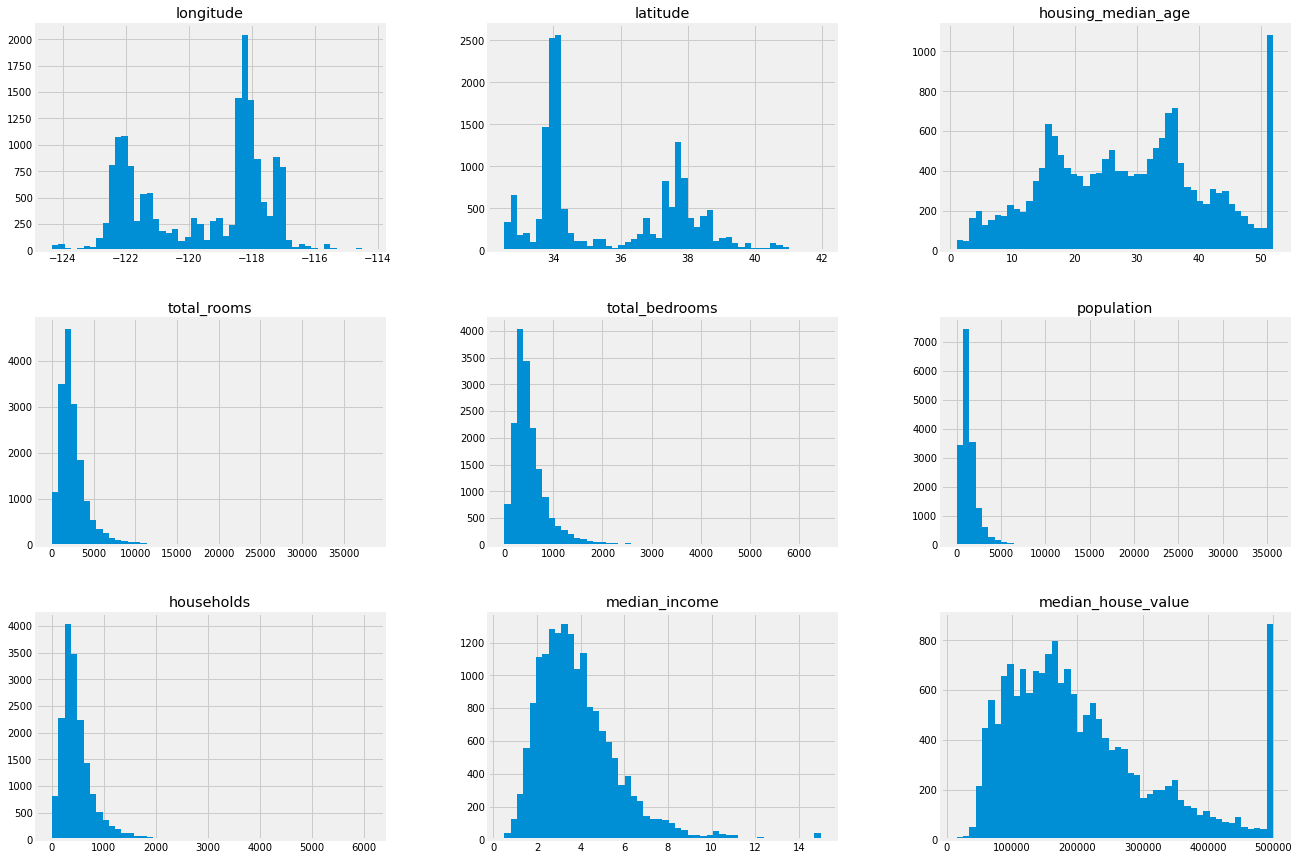

In [ ]:
# training set hist
housing_train.hist(bins=50, figsize=(20, 15))
plt.show()

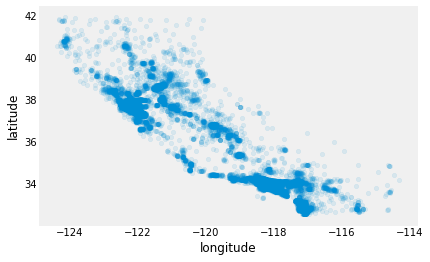

In [ ]:
# training set latitude longitude scatter plot
housing_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.grid(False)
plt.show()

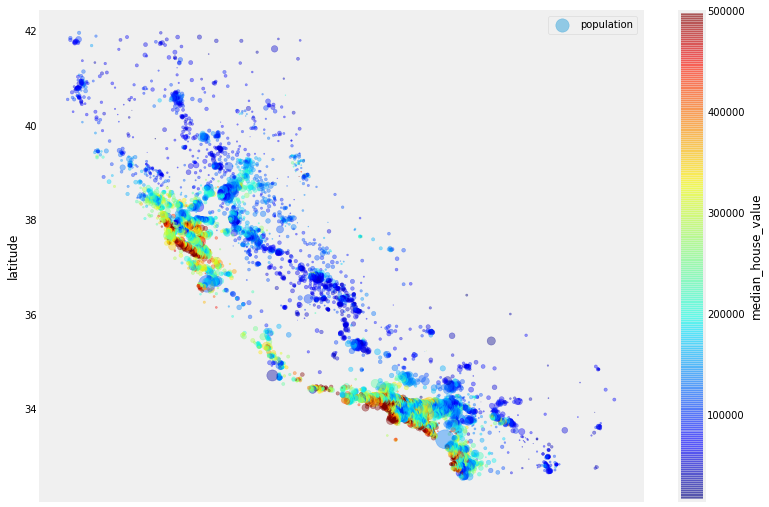

In [ ]:
# training set latitude longitude, population, and median_median_house_value scatterplot
# is that california?
housing_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(12,9), s=housing_train['population']/100, label='population', c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.grid(False)
plt.show()